- EXTRACT DATA (PAYER NAME, AGE AND VALUE)
- CLEAN NUMBERS, REMOVE LETTERS, SPECIAL CHARACTERS...etc.
- CONVERT TO DATAFRAME
- CREATE SCATTER PLOT VISULIZATION

#COLLECTING

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.com/esperance-tunis/startseite/verein/3342"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

playername = pageSoup.find_all("div", {"class": "di nowrap"})

playerage = pageSoup.find_all("td", {"class": "zentriert"})

playervalue = pageSoup.find_all("td", {"class": "rechts hauptlink"})


Name = []
Ages = []
Value = []

for i in range(0, len(playername), 2):
  Name.append(playername[i].text)

for i in range(0, len(playerage)):
  Ages.append(playerage[i].text)

for i in range(0, len(playervalue) ):
  Value.append(playervalue[i].text)
Age = []
for i in Ages:
  if len(i) == 17:
    Age.append(i)
  elif len(i) == 16:
    Age.append(i)

df = pd.DataFrame(list(zip(Name, Age, Value)),
               columns =['Name', 'Age', 'Value'])
df


,Name,Age,Value
0,Moez Ben Cherifia,"Jun 24, 1991 (31)",€800Th.
1,Farouk Ben Mustapha,"Jul 1, 1989 (32)",€800Th.
2,Mohamed Sedki Debchi,"Oct 28, 1999 (22)",€150Th.
3,Wassim Karoui,"Jan 7, 1997 (25)",€50Th.
4,Abdelkader Bedrane,"Apr 2, 1992 (30)",€900Th.
5,Mohamed Amine Tougai,"Jan 22, 2000 (22)",€725Th.
6,Mohamed Ali Yaakoubi,"Oct 5, 1990 (31)",€400Th.
7,Khalil Chemmam,"Jul 24, 1987 (34)",€250Th.
8,Hani Amamou,"Sep 16, 1997 (24)",€200Th.
9,Bilel Chabbar,"Mar 31, 2000 (22)",€75Th.


#CLEANING

In [ ]:

for i in range(len(Value)):
  Value[i] = re.sub('[^\d\.\ ]', '', Value[i])
  if Value[i] != "":
    Value[i] = float(Value[i])
  else:
    Value[i] = 0

for i in range(len(Value)):
  if Value[i] == int(Value[i]):
    Value[i] = Value[i] * 1000
  else:
    Value[i] = Value[i] * 1000000


for i in range(len(Age)):
  Age[i] = re.findall('(?=\().+?(?=\))', Age[i])
  Age[i] = re.findall('\d\d', str(Age[i]))
  Age[i] = ''.join(Age[i])
  Age[i] = int(Age[i])




df = pd.DataFrame(list(zip(Name, Age, Value)),
               columns =['Name', 'Age', 'Value'])
df



,Name,Age,Value
0,Moez Ben Cherifia,30,800000.0
1,Farouk Ben Mustapha,32,800000.0
2,Mohamed Sedki Debchi,22,150000.0
3,Wassim Karoui,25,50000.0
4,Abdelkader Bedrane,30,900000.0
5,Mohamed Amine Tougai,22,725000.0
6,Mohamed Ali Yaakoubi,31,400000.0
7,Khalil Chemmam,34,250000.0
8,Hani Amamou,24,200000.0
9,Bilel Chabbar,22,75000.0


#VISUALISATION

Graph displaying the market value (in millions) of all players in the 2021-22 Squad of Esperance de Tunis compared with their age.
Values extracted from "TransferMarkt"

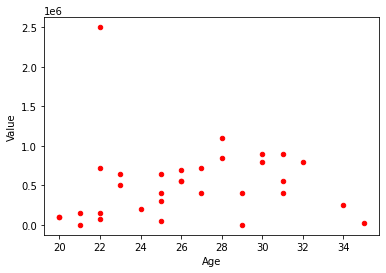

In [ ]:
df2 = df.plot.scatter(x='Age', y='Value', c='Red')